# Regression Applications to Wine Quality Prediction (In Progress)

## Dataset Description/Project Motivations

### Dataset Abstract: 
"Two datasets are included, related to red and white vinho verde wine samples, from the north of Portugal. The goal is to model wine quality based on physicochemical tests" 

### Business Objective
Wine is increasingly being enjoyed by consumers all around the globe. Quality is a very important factor for all consumers when choosing a product and thus a very important factor for finding the ideal wine to purchase. 

Wouldn't it be interesting to be able to predict wine quality through some of its psyicochemical attributes? This project seeks to develop a model that helps the wine industry predict a wines quality through these factors with the most accuracy. For the purpose of this analysis, I will be utilizing the red wine dataset to predict wine quality based on their physicochemical features. 

This is a supervised learning problem for Regression/Classification in which I will be utilizing Linear Regression Models, and Random Forest Algorithms for practice. 

Predictions will be evaluated by MSE function as well as Accuracy Score/Confusion Matrix after rounding predictions. 

### Dataset Features 
There are 1599 samples of red wine in the data set. Each wine sample (row) has the following characteristics (columns):

Input variables (based on physicochemical tests): 
* 1 - fixed acidity 
* 2 - volatile acidity 
* 3 - citric acid 
* 4 - residual sugar 
* 5 - chlorides 
* 6 - free sulfur dioxide 
* 7 - total sulfur dioxide 
* 8 - density 
* 9 - pH 
* 10 - sulphates 
* 11 - alcohol 

Output variable (based on sensory data): 
* 12 - quality (score between 0 and 10)



Further details about the dataset can be located at the below link. 
https://archive.ics.uci.edu/ml/datasets/wine+quality

## Software and Libraries

This project uses the following software and Python libraries:

* pandas
* NumPy
* seaborn 
* matplotlib
* scikit-learn
* graphviz 
* math

## Project Objectives

* Attempt using Linear Regression/Random Forest to predict Wine quality based on physicochemical features
* Basic data exploration
* Develop skills in Python

![Wine Machine Learning](http://discovermagazine.com/~/media/Images/Issues/2016/September/wine.jpg)

### Import Relevant Libraries

First, I will import the dependent packages for the project as well as the dataset from UCI Machine Learning Repository.

In [270]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import confusion_matrix
from sklearn import tree
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from pandas_ml import ConfusionMatrix
import math
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

# Add Plots inline for increased clarity
%matplotlib inline

# Hide Warnings 
import warnings 
warnings.filterwarnings('ignore')

In [203]:
dataset_url = 'http://mlr.cs.umass.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
data = pd.read_csv(dataset_url, sep=';')

### Data Cleaning/Data Exploration

In the Data Cleaning/Exploration step, I will first look into some descriptive statistics to get a feel for the data via the head, info, and describe functions. I will also address outliers/nulls (if necessary). 

The are 1599 observations in the dataset as well as 11 predictive features which are all numerical values. The label value is the last column called quality which seems to be very centrally skewed to the ratings of 5 and 6. Although a scale of 1-10 is used all ratings are between a min and max of 3-8. 

A quick summary through the describe function shows the standard deviation, min value, 25th percentile, 50th percentile, 75th percentile, and max value of each feature in the Wine dataset. 

The below histograms are also very useful for examining the features in the wine dataset. 

In [204]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [205]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [206]:
round(data.describe(),2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00
mean,8.32,0.53,0.27,2.54,0.09,15.87,46.47,1.00,3.31,0.66,10.42,5.64
std,1.74,0.18,0.19,1.41,0.05,10.46,32.90,0.00,0.15,0.17,1.07,0.81
min,4.60,0.12,0.00,0.90,0.01,1.00,6.00,0.99,2.74,0.33,8.40,3.00
25%,7.10,0.39,0.09,1.90,0.07,7.00,22.00,1.00,3.21,0.55,9.50,5.00
50%,7.90,0.52,0.26,2.20,0.08,14.00,38.00,1.00,3.31,0.62,10.20,6.00
75%,9.20,0.64,0.42,2.60,0.09,21.00,62.00,1.00,3.40,0.73,11.10,6.00
max,15.90,1.58,1.00,15.50,0.61,72.00,289.00,1.00,4.01,2.00,14.90,8.00


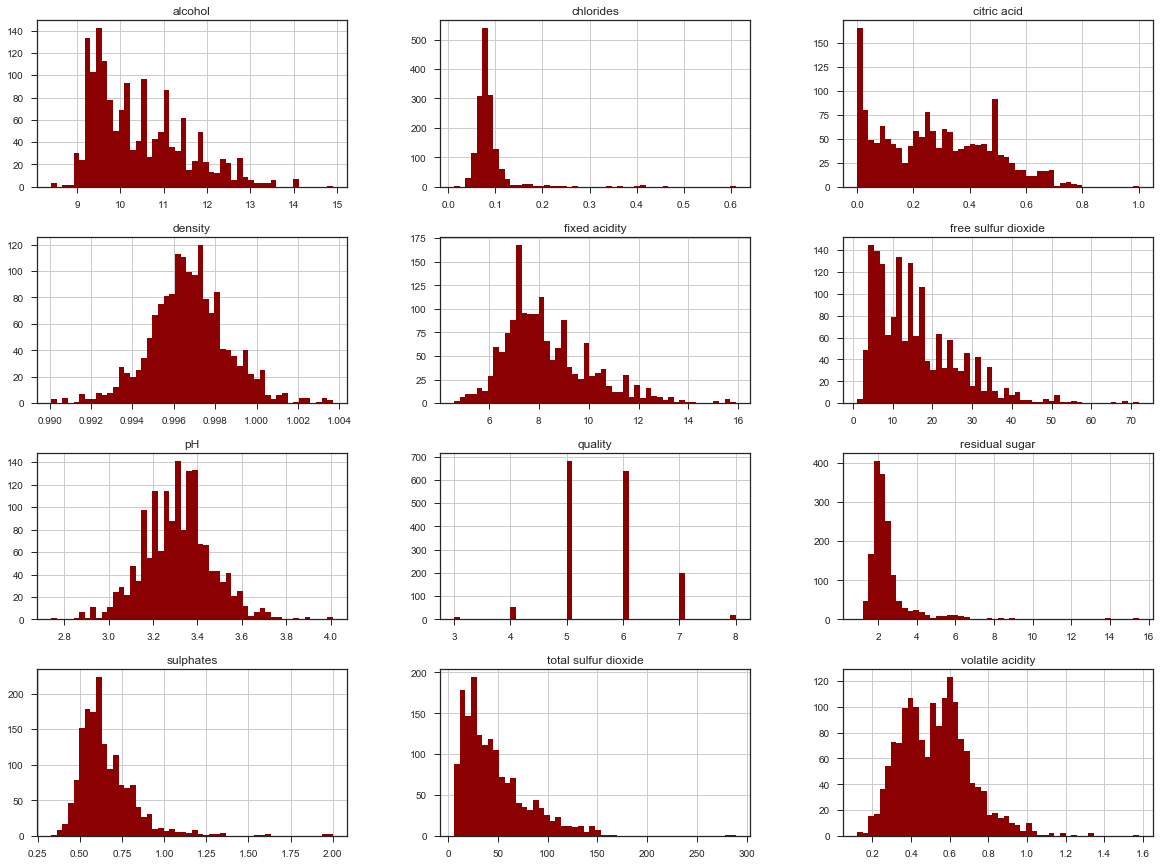

In [207]:
data.hist(bins=50, figsize=(20,15), color = 'darkred')
plt.show()

Looks like there are no nulls in the dataset which means no null removal is needed.

In [208]:
data.isnull().any()

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool

### Splitting the dataset into the Training set and Test set 

The data must be split into a training set as one has not been provided. I am using the sklearn package to perform the training and test data split and decided to perform an 80:20 ratio split. 
80 % for Training and 20 % for Testing/Validation purposes.

In [209]:
train_set, test_set = train_test_split(data, test_size = 0.2, random_state = 42)

### Examining the Training Set

It is important to explore and visualize the training set to gain insights that will help construct your model. 

First, I looked at distribution of quality in the training set. 
Much like the entire dataset the quality is heavily skewed to 5 and 6 with around 80 % of observations falling in this range. 

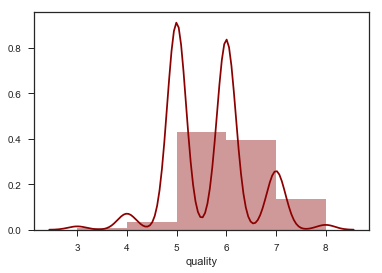

In [282]:
graph1 = sns.distplot(train_set.quality, bins=5, color='darkred')
graph1

### Feature Analysis
The dataset contains the below 11 features: 
* 1 - fixed acidity 
* 2 - volatile acidity 
* 3 - citric acid 
* 4 - residual sugar 
* 5 - chlorides 
* 6 - free sulfur dioxide 
* 7 - total sulfur dioxide 
* 8 - density 
* 9 - pH 
* 10 - sulphates 
* 11 - alcohol 



### Looking for Correlations

Correlation Matrixes are incredibly useful for seeing patterns in the data.
Correlations can range from -1 to 1 which indicate how positively and negatively correlated two attributes are. 

The attributes with the highest positive correlations to wine quality were alcohol (not surprisingly), sulphates, and citric acid. 

The attributes with the highest negative correlations to wine quality were volatile acidity, total sulfur dioxide, and density. 

There are also a number of variables that correlate with eachother. (Multicollinearity)
* Citric Acid/Fixed Acidity
* Density/Fixed Acidity 
* Total Sulfur Dioxide/Free Sulfur Dioxide

In [283]:
corr_matrix = train_set.corr()
corr_matrix['quality'].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.472676
sulphates               0.242596
citric acid             0.216115
fixed acidity           0.122488
residual sugar          0.005425
pH                     -0.045185
free sulfur dioxide    -0.055860
chlorides              -0.126541
density                -0.167091
total sulfur dioxide   -0.200067
volatile acidity       -0.378372
Name: quality, dtype: float64

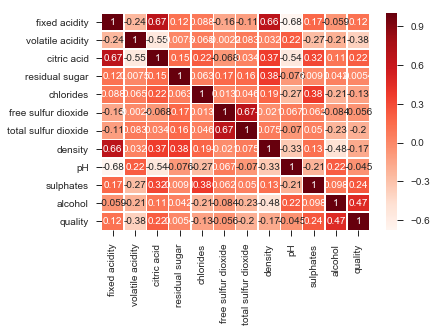

In [284]:
sns.heatmap(corr_matrix,annot=True,linewidths=.5,cmap="Reds")

### Focusing On Attributes With Correlation to Quality 

Here I will examine whether any features seem to have great impact on how the wine connoseuirs reviewed. These features include alcohol, sulphates, citric acid, and volatile acidity, and total sulfur dioxide. I cannot really see any other strong linear patterns other than the alcohol feature. 

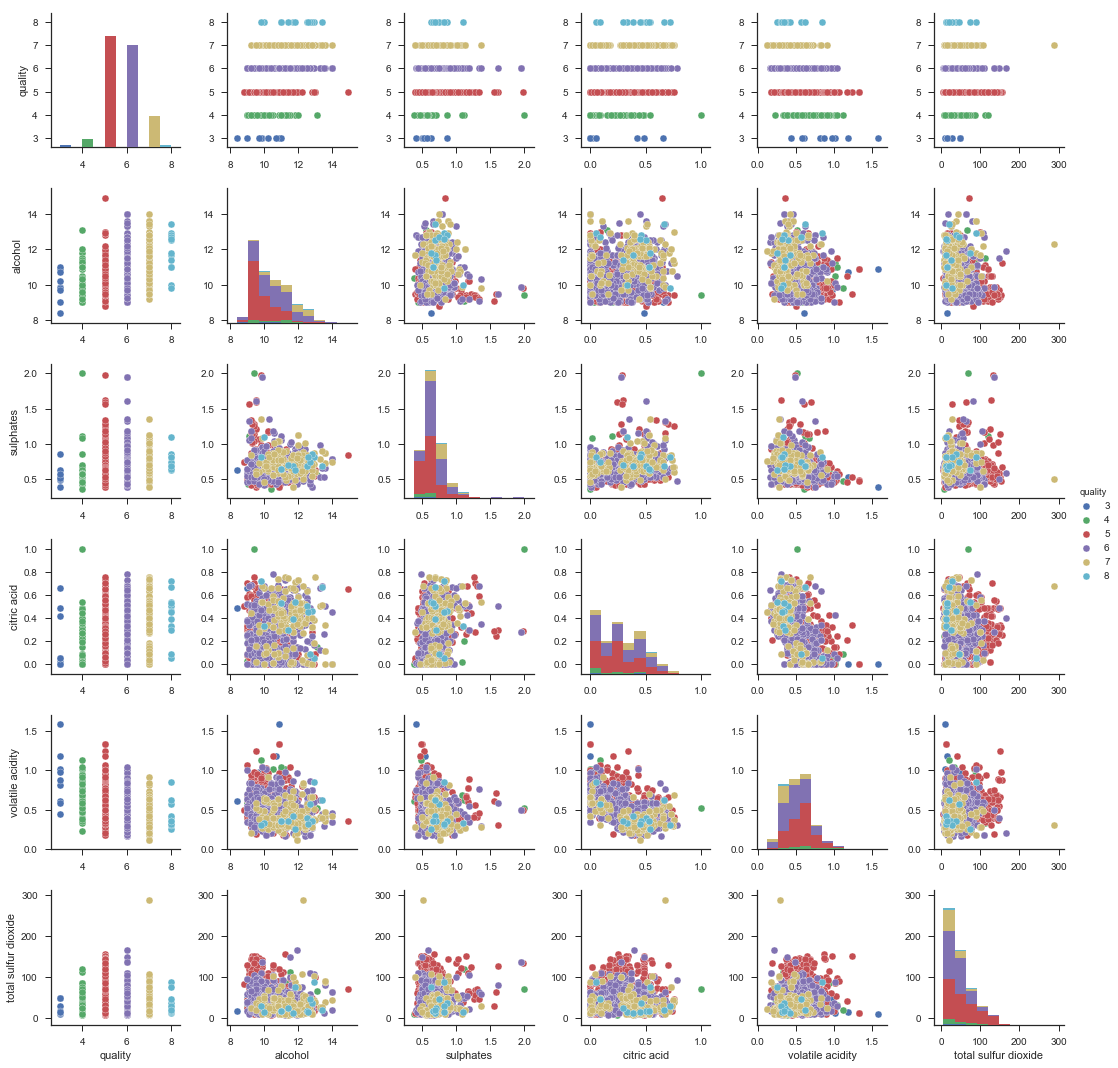

In [285]:
attributes = ['quality','alcohol','sulphates','citric acid','volatile acidity','total sulfur dioxide']
sns.set(style="ticks")
sns.pairplot(train_set[attributes], hue="quality")

Alcohol seems to be the most correlated attribute to wine quality evaluation. 
The Scatter plot below helps visualize the distribution of alcohol content vs quality. 

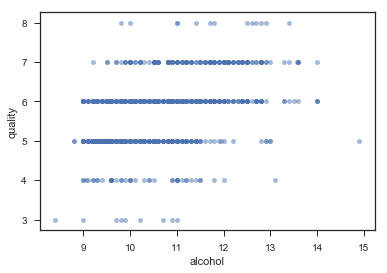

In [286]:
train_set.plot(kind='scatter',x='alcohol',y='quality', alpha=0.5)

### Data Preparation/Pipeline for Machine Learning

First, I will split the Independent and Dependent Variables from the training and test sets into separate datasets. Then I will create a pipeline for performing feature scaling. 

In [287]:
X_train = train_set.drop('quality',axis=1)
y_train = train_set['quality'].copy()

X_test = test_set.drop('quality',axis=1)
y_test = test_set['quality'].copy()

In [288]:
pipeline = make_pipeline(preprocessing.StandardScaler())
X_train = pipeline.fit_transform(X_train)

### Multiple Linear Regression with all features

I will fit a Multiple Linear Regression Model with all the features as it is simple and easy to implement on the data.

It is also good practice for implementing Linear Regression in Python. 

In [289]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

The predict function is then used to predict the results against the training data and assigned to array y_pred. 

In [290]:
y_pred = regressor.predict(X_train)

### Multiple Linear Regression (All-In) Mean Squared Error Performance Measure

The Mean Squared Error is the Performance Measure of Choice for this Machine Learning Problem in combination with the ConfusionMatrix/Accuracy Rate after rounding. The Model seems to give predictions that are around .65 away from the actual value. This is not to so great considering the quality distribution is around 3-8. 

A confusion matrix after prediction rounding reveals that the accuracy rate is 59 % which is slightly better than guessing. 

In [291]:
mse = mean_squared_error(y_train, y_pred)
print('mse =', mse)
print('sqrt =', math.sqrt(mse))

print('The Linear Model gives predictions that are within around', round(math.sqrt(mse),2), 'of the true reviewed quality') 

mse = 0.424191157314
sqrt = 0.6512995910592836
The Linear Model gives predictions that are within around 0.65 of the true reviewed quality


In [292]:
cm = confusion_matrix(y_train, np.around(y_pred))
cm

array([[  0,   1,   7,   1,   0,   0],
       [  0,   0,  26,  17,   0,   0],
       [  0,   2, 392, 155,   2,   0],
       [  0,   0, 148, 340,  18,   0],
       [  0,   0,   7, 121,  29,   0],
       [  0,   0,   0,  10,   3,   0]])

### Multiple Linear Regression (All-In) Accuracy Score

In [293]:
accuracy_score(y_train, np.around(y_pred))

0.59499609069585613

In [294]:
recall_score(y_train, np.around(y_pred),average='macro')

0.26134731524921112

### Multiple Linear Regression (All-In) Cross Validation Scores 

Cross Validation is a method for evaluating how effective a model is. The Cross Val Score function from sklearn will split the data into ten parts and evaluate the model/classifier on all 10 parts. The average of those 10 "folds" will then be the model's accuracy or effectiveness. 

This model averaged an error of .65 with a Standard Deviation of (+-) .05

In [295]:
scores = cross_val_score(regressor, X_train,y_train,scoring='neg_mean_squared_error',cv=10)
rmse_scores = np.sqrt(-scores)
rmse_scores

array([ 0.62576397,  0.71661737,  0.69198217,  0.70092111,  0.67935552,
        0.67375579,  0.66745333,  0.67890987,  0.49594792,  0.64828114])

In [296]:
def display_scores(scores):
    print('Scores:',scores)
    print('Mean:',scores.mean())
    print('Standard deviation: (+-)',scores.std())

In [297]:
display_scores(rmse_scores)

Scores: [ 0.62576397  0.71661737  0.69198217  0.70092111  0.67935552  0.67375579
  0.66745333  0.67890987  0.49594792  0.64828114]
Mean: 0.657898818693
Standard deviation: (+-) 0.0592100416156


### Multiple Linear Regression (All-In) Summary

In [298]:
X_train = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.348
Model:                            OLS   Adj. R-squared:                  0.342
Method:                 Least Squares   F-statistic:                     61.48
Date:                Thu, 07 Dec 2017   Prob (F-statistic):          1.48e-109
Time:                        00:19:28   Log-Likelihood:                -1266.4
No. Observations:                1279   AIC:                             2557.
Df Residuals:                    1267   BIC:                             2619.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.6239      0.018    307.360      0.000       5.588       5.660
x1             0.0398      0.050      0.801      0.423      -0.058       0.137
x2            -0.1794      0.025     -7.283      0.000      -0.228      -0.131
x3            -0.0275      0.033     -0.839      0.402      -0.092       0.037
x4             0.0094      0.024      0.391      0.696      -0.038       0.057
x5            -0.0891      0.023     -3.949      0.000      -0.133      -0.045
x6             0.0580      0.026      2.252      0.025       0.007       0.109
x7            -0.1200      0.027     -4.419      0.000      -0.173      -0.067
x8            -0.0192      0.045     -0.428      0.669      -0.107       0.069
x9            -0.0606      0.033     -1.830      0.067      -0.126       0.004
x10            0.1468      0.022      6.651      0.000       0.104       0.190
x11            0.2966      0.031      9.465      0.000       0.235       0.358
==============================================================================
Omnibus:                       28.708   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               46.050
Skew:                          -0.192   Prob(JB):                     1.00e-10
Kurtosis:                       3.847   Cond. No.                         7.02
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Building the Optimal Model Linear Model via Backward Elimination 
We need to choose variables that we think we’ll be good predictors for the dependent variable. I used the backward elimination method with a pvalue threshold of > .05. The below details the order of removed variables as well as optimal model features based on this logic. 

Optimal Model Features: 
* 2 - volatile acidity
* 5 - chlorides
* 6 - free sulfur dioxide
* 7 - total sulfur dioxide
* 9 - pH
* 10 - sulphates
* 11 - alcohol

Removed Features in Order via Backward Elimination: 
* 4 - residual sugar (1)
* 8 - density (2)
* 1 - fixed acidity (3)
* 3 - citric acid (4)

In [299]:
X_opt = X_train[:, [0,2,5,6,7,9,10,11]]
regressor_OLS = sm.OLS(endog = y_train, exog=X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.347
Model:                            OLS   Adj. R-squared:                  0.344
Method:                 Least Squares   F-statistic:                     96.69
Date:                Thu, 07 Dec 2017   Prob (F-statistic):          3.34e-113
Time:                        00:19:31   Log-Likelihood:                -1266.9
No. Observations:                1279   AIC:                             2550.
Df Residuals:                    1271   BIC:                             2591.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.6239      0.018    307.721      0.000       5.588       5.660
x1            -0.1698      0.020     -8.350      0.000      -0.210      -0.130
x2            -0.0963      0.021     -4.544      0.000      -0.138      -0.055
x3             0.0630      0.025      2.514      0.012       0.014       0.112
x4            -0.1285      0.026     -5.023      0.000      -0.179      -0.078
x5            -0.0738      0.020     -3.604      0.000      -0.114      -0.034
x6             0.1445      0.021      6.803      0.000       0.103       0.186
x7             0.3031      0.020     14.887      0.000       0.263       0.343
==============================================================================
Omnibus:                       26.611   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               41.868
Skew:                          -0.182   Prob(JB):                     8.10e-10
Kurtosis:                       3.808   Cond. No.                         2.47
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Utilizing the New Optimized Model

First, I will fit create a new regressor for the new model,fit it to the new dataset, and predict the results.  

In [300]:
regressor2 = LinearRegression()

In [301]:
regressor2.fit(X_opt, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [302]:
y_pred_OLS = regressor2.predict(X_opt)

### Multiple Linear Regression (Backward Elimination) Mean Squared Error Performance Measure
The Model seems to give predictions that are around .65 away from the actual wine quality value.

This model shows no improvement to the model with all predictive features. 
A confusion matrix after prediction rounding reveals that the accuracy rate is 59 % and slightly worse than the previous model. 

In [306]:
mseopt = mean_squared_error(y_train, y_pred_OLS)
print('mse =', mseopt)
print('sqrt =', math.sqrt(mseopt))

print('The Linear Model gives predictions that are within around', round(math.sqrt(mse),2), 'of the true reviewed quality') 

mse = 0.424532803665
sqrt = 0.6515618187596669
The Linear Model gives predictions that are within around 0.65 of the true reviewed quality


### Multiple Linear Regression (Backward Elimination) Accuracy

In [307]:
cm2 = confusion_matrix(y_train, np.around(y_pred_OLS))
cm2

array([[  0,   1,   7,   1,   0,   0],
       [  0,   0,  26,  17,   0,   0],
       [  0,   2, 390, 157,   2,   0],
       [  0,   0, 145, 341,  20,   0],
       [  0,   0,   7, 121,  29,   0],
       [  0,   0,   0,   9,   4,   0]])

In [308]:
accuracy_score(y_train, np.around(y_pred_OLS))

0.59421422986708361

In [309]:
recall_score(y_train, np.around(y_pred_OLS),average='macro')

0.26107173533581851

###  Multiple Linear Regression (Backward Elimination) Cross Validation 

The model averaged an error of .65 with a Standard Deviation of (+-) .05 which is no improvement from the previous model.

In [310]:
from sklearn.model_selection import cross_val_score
scores2 = cross_val_score(regressor2, X_opt,y_train,scoring='neg_mean_squared_error',cv=10)
rmse_scores2 = np.sqrt(-scores2)
rmse_scores2

array([ 0.62512982,  0.70980345,  0.69221841,  0.70035936,  0.67873507,
        0.66493909,  0.66540806,  0.67595989,  0.49443978,  0.64889736])

In [311]:
def display_scores(scores2):
    print('Scores:',scores2)
    print('Mean:',scores2.mean())
    print('Standard deviation: (+-)',scores2.std())

In [312]:
display_scores(rmse_scores2)

Scores: [ 0.62512982  0.70980345  0.69221841  0.70035936  0.67873507  0.66493909
  0.66540806  0.67595989  0.49443978  0.64889736]
Mean: 0.65558902806
Standard deviation: (+-) 0.0586186562255


### Random Forest Regression

Lastly, I will attempt to fit a Random Forest Regressor on to the data and see what result it gives me. Historically, Random Forest has given me good prediction values for other problems.

In [313]:
RFregressor = RandomForestRegressor()
RFregressor.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [314]:
RFy_pred = RFregressor.predict(X_train)

### Random Forest Performance

By itself the Random Forest seems to perform very strongly with an average prediction within .26 of the actual quality. This is way better than the previous two multiple linear regression models. 

A confusion matrix also reveals an accuracy score of 92 % but I will need to look into cross validation to determine whether this is overfitting the data or not. 

In [315]:
mse3 = mean_squared_error(y_train, RFy_pred)
print('mse =', mse3)
print('sqrt =', math.sqrt(mse3))

print('The Random Forest gives predictions that are within around', round(math.sqrt(mse3),2), 'of the true reviewed quality') 

mse = 0.066684910086
sqrt = 0.25823421556022486
The Random Forest gives predictions that are within around 0.26 of the true reviewed quality


In [316]:
cm3 = confusion_matrix(y_train, np.around(RFy_pred))
cm3

array([[  1,   8,   0,   0,   0,   0],
       [  0,  29,  13,   1,   0,   0],
       [  0,   0, 526,  25,   0,   0],
       [  0,   0,   7, 495,   4,   0],
       [  0,   0,   0,  31, 126,   0],
       [  0,   0,   0,   0,   4,   9]])

In [317]:
accuracy_score(y_train, np.around(RFy_pred))

0.92728694292415947

In [318]:
recall_score(y_train, np.around(RFy_pred), average='macro')  

0.70221233291985385

### Random Forest Regression Cross Validation

Cross Validation reveals that my assumption about overfitting was indeed true.

The model in actuality averaged an error of .62 with a Standard Deviation of (+-) .05 which is not much improvement from both linear regression models.

In [319]:
RFscores = cross_val_score(RFregressor, X_train,y_train,scoring='neg_mean_squared_error',cv=10)
RFrmsescores = np.sqrt(-RFscores)
RFrmsescores

array([ 0.63035208,  0.68954242,  0.66385475,  0.60285778,  0.64335546,
        0.6684871 ,  0.61371054,  0.71304803,  0.49804305,  0.62902249])

In [320]:
def display_scores(RFscores):
    print('Scores:',RFscores)
    print('Mean:',RFscores.mean())
    print('Standard deviation: (+-)',RFscores.std())

In [321]:
display_scores(RFrmsescores)

Scores: [ 0.63035208  0.68954242  0.66385475  0.60285778  0.64335546  0.6684871
  0.61371054  0.71304803  0.49804305  0.62902249]
Mean: 0.635227369624
Standard deviation: (+-) 0.0560272747381


### Random Forest HyperParameter Tuning via Grid Search CV 

This is my first time implementing HyperParameter Tuning. There are many ways to tune hyperparameters including Grid Search and Random Search. 
Just as predictive models need to be tuned the hyperparameters in a specific algorithm also need to be tuned. 

For this Random Forest I have tried various values for tuning on the below hyperparameters. 
* 'n_estimators': [30,100,500] - (Number of Trees) 
* 'max_features': ['auto','sqrt','log2'] - (Max features in the Random Forest) 
* 'bootstrap':[True,False] - (Whether to bootstrap or not) 

In [322]:
##More Sophisticated Methods
##Bayesian Optimization (One of the best sophisticated methods for hyperparameter tuning )
from sklearn.model_selection import GridSearchCV
param_grid = {'n_estimators': [30,100,500],'max_features': ['auto','sqrt','log2'], 'bootstrap':[True,False]}

In [323]:
grid_search = GridSearchCV(RFregressor, param_grid, cv=5, 
                           scoring='neg_mean_squared_error')

In [324]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [30, 100, 500], 'max_features': ['auto', 'sqrt', 'log2'], 'bootstrap': [True, False]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

The bestparams function displays which parameters received the highest model score. 

In [325]:
grid_search.best_params_

{'bootstrap': False, 'max_features': 'sqrt', 'n_estimators': 500}

### HyperParameter Tuning Scores

When tuning hyperparameters - you can also get scores for all the hyperparameters. 

The lowest score was for a Random Forest model after tuning was .59 which is an improvement of .3 down from .62

In [326]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres['mean_test_score'],cvres['params']):
    print(np.sqrt(-mean_score), params)

0.61646042519 {'bootstrap': True, 'max_features': 'auto', 'n_estimators': 30}
0.607328581787 {'bootstrap': True, 'max_features': 'auto', 'n_estimators': 100}
0.606407055376 {'bootstrap': True, 'max_features': 'auto', 'n_estimators': 500}
0.611327782409 {'bootstrap': True, 'max_features': 'sqrt', 'n_estimators': 30}
0.603362418431 {'bootstrap': True, 'max_features': 'sqrt', 'n_estimators': 100}
0.600401968557 {'bootstrap': True, 'max_features': 'sqrt', 'n_estimators': 500}
0.612084029791 {'bootstrap': True, 'max_features': 'log2', 'n_estimators': 30}
0.600563847651 {'bootstrap': True, 'max_features': 'log2', 'n_estimators': 100}
0.6007454556 {'bootstrap': True, 'max_features': 'log2', 'n_estimators': 500}
0.77196557485 {'bootstrap': False, 'max_features': 'auto', 'n_estimators': 30}
0.770601493286 {'bootstrap': False, 'max_features': 'auto', 'n_estimators': 100}
0.771452701924 {'bootstrap': False, 'max_features': 'auto', 'n_estimators': 500}
0.604369747846 {'bootstrap': False, 'max_feat

### Conclusion
These Models are not very great so I will not deploy them against the test set. Perhaps wine quality is a challenge to predict via regression as the quality seems to skew around 5 & 6 and feature relationships are not very linear. I will attempt this again with some classification algorithms and see if I can return some better results. Some other literature in SVM's has attained accuracy rates of around 80 % which I also may look into. Perhaps it would be better to transform this into a classification problem where 3-4 Quality = Bad, 5-6 = Average, and 7-8 = Good. 

In summary: - Average Error Rates/Accuracy Rates from prediction were. 
* Linear Regression: .65 via Cross Validation  (59 % Accuracy after rounding)


* Backward Elimination Linear Reression: .65 via Cross Validation (59 % Accuracy after rounding)


* Random Forest: .26 normal, .63 via Cross Validation, Tuned down to .59, (93 % Accuracy but Overfit)

Some new things I learned in Machine Learning were the use of Cross Validation to determine model overfitting/underfitting/accuracy as well as hyperparameter tuning. I also learned techniques for creating Machine Learning pipelines which help make the data cleaning and transformation phase much easier. This knowledge will be indispensible in future machine learning problems. I will also continue to work on this problem with other models.


![Wine Machine Learning](https://d2v9y0dukr6mq2.cloudfront.net/video/thumbnail/2T0t-6V/drunk-man-wine-blues-focus-on-a-wine-bottle-defocused-a-man-in-the-background-feeling-the-blues-theme-alcoholism-depression-failure_4kmvsmbdl__F0000.png)